In [35]:
# Copy the content of this cell to the first cell of every IPython notebook you use

import pandas as pd               # Data manipulation, analysis and visualization
import numpy as np                # Powerful numerical arrays. A foundational package for other packages
import matplotlib.pyplot as plt   # Data visualization
from sklearn import ensemble as es
from sklearn import cross_validation as cv
from sklearn import metrics

# Enable inline plotting (no new windows):
%matplotlib inline

In [2]:
dados = pd.read_csv('cs_training.csv', encoding='utf-8', index_col=0)

In [3]:
dados.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [4]:
dados.columns = ['target', 'porcentagem_utilizacao', 'idade', 'numero_vezes_atraso_entre_30_59', 'divida_pela_renda', 'renda',
                 'numero_linhas_credito', 'numero_vezes_atraso_maior_90', 'numero_hipotecas', 'numero_vezes_atraso_entre_60_89',
                 'numero_dependentes']

In [5]:
print dados.shape

(150000, 11)


In [9]:
df_train, df_test = cv.train_test_split(dados, test_size=0.25, random_state=42)

In [10]:
df_train, df_val = cv.train_test_split(df_train, test_size=0.2, random_state=42)

In [11]:
print df_train.shape
print df_val.shape
print df_test.shape

(90000, 11)
(22500, 11)
(37500, 11)


# Análise Descritiva - Raw Data

### Porcentagem de missing

In [13]:
for variavel in df_train.columns[1:]:
    print '% Missing - ' + variavel + ': ' + str(sum(df_train[variavel].isnull())*1./df_train.shape[0])

% Missing - porcentagem_utilizacao: 0.0
% Missing - idade: 0.0
% Missing - numero_vezes_atraso_entre_30_59: 0.0
% Missing - divida_pela_renda: 0.0
% Missing - renda: 0.197977777778
% Missing - numero_linhas_credito: 0.0
% Missing - numero_vezes_atraso_maior_90: 0.0
% Missing - numero_hipotecas: 0.0
% Missing - numero_vezes_atraso_entre_60_89: 0.0
% Missing - numero_dependentes: 0.0260333333333


### Distribuições Univariadas

/Users/carlos/Documents/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2633: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


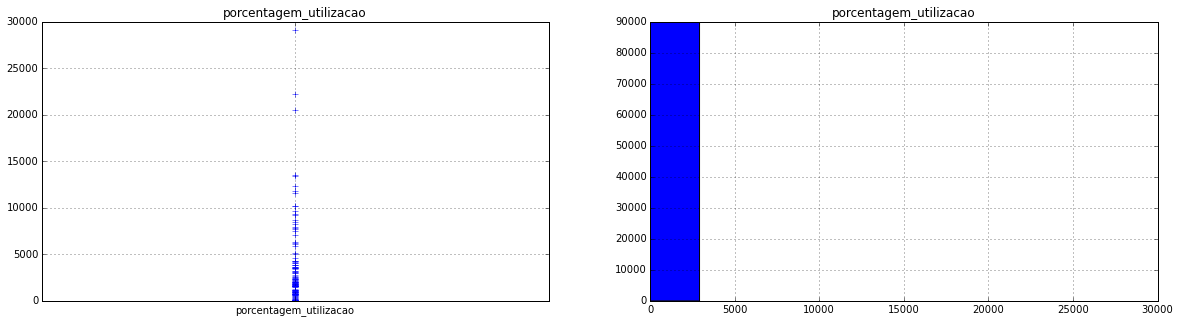

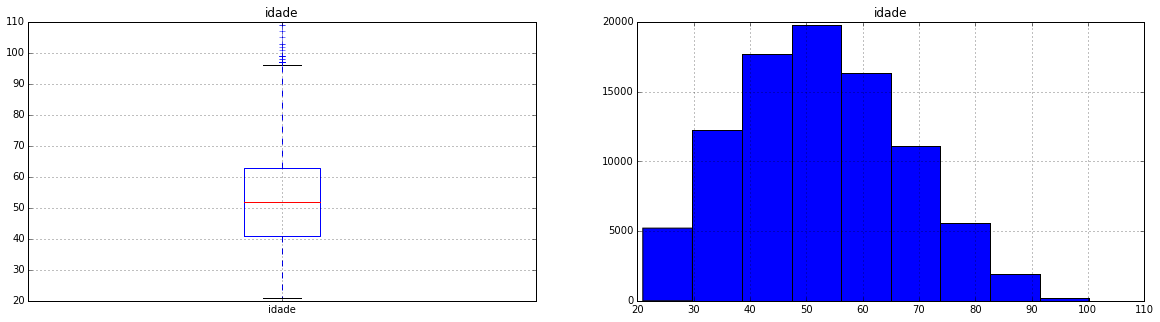

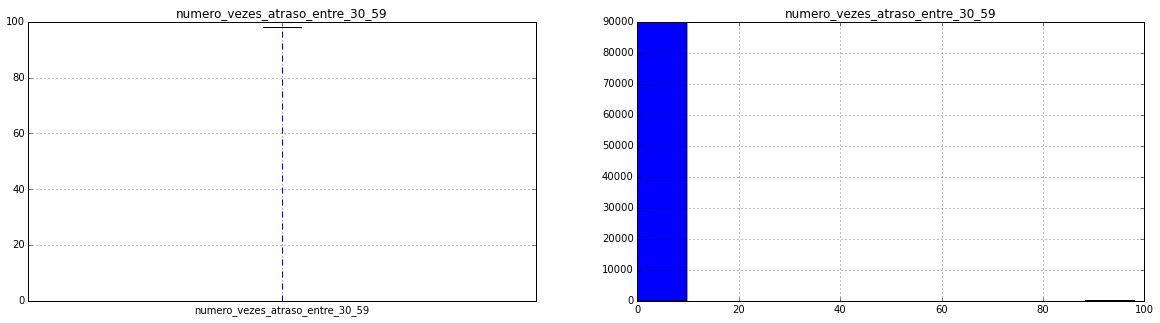

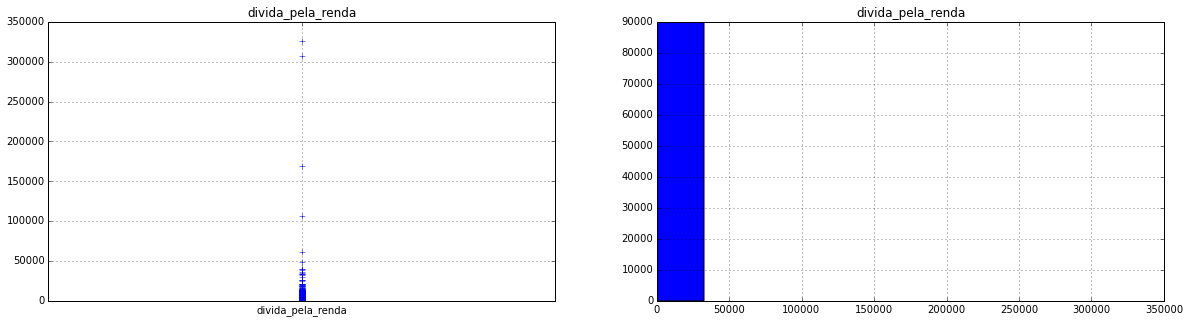

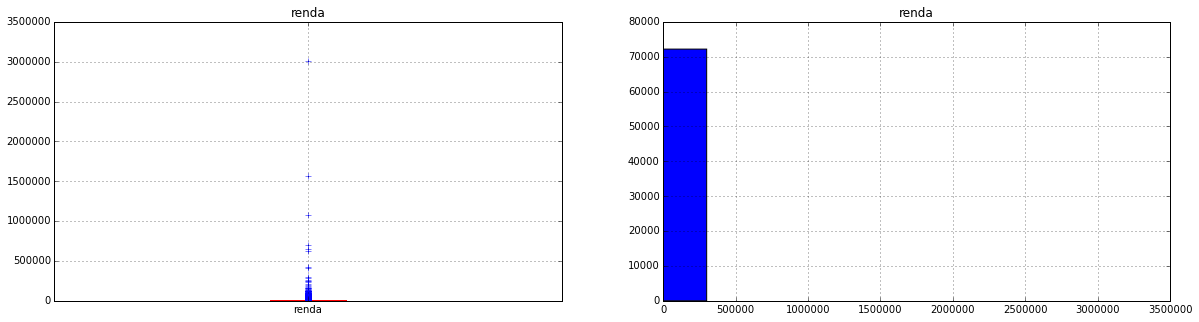

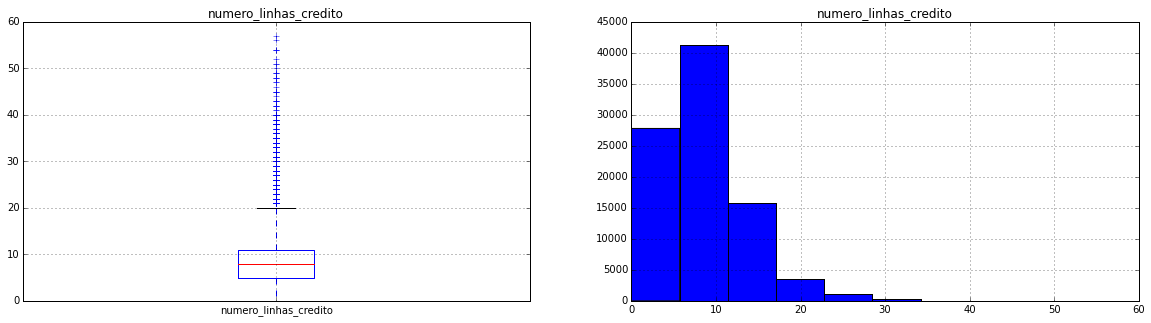

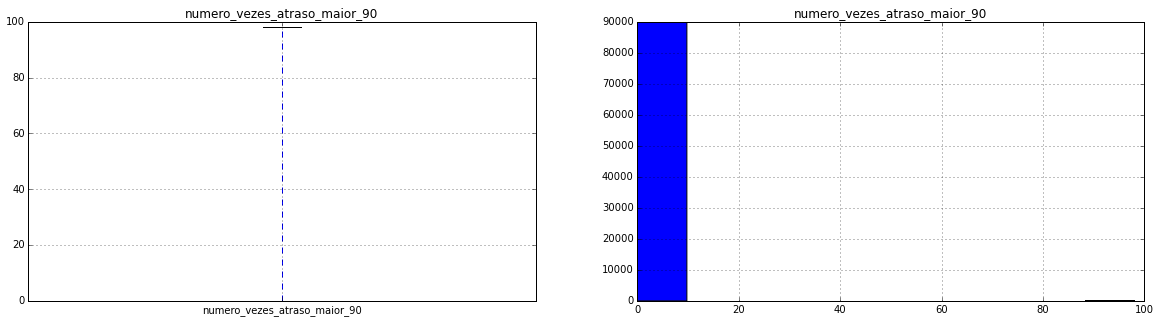

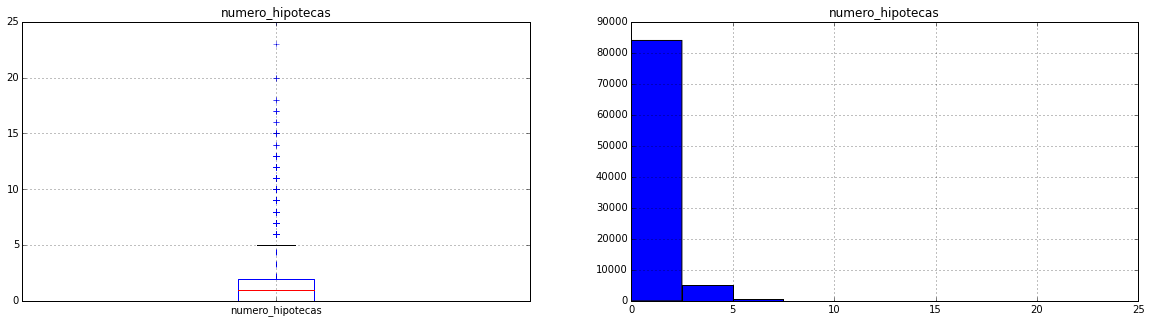

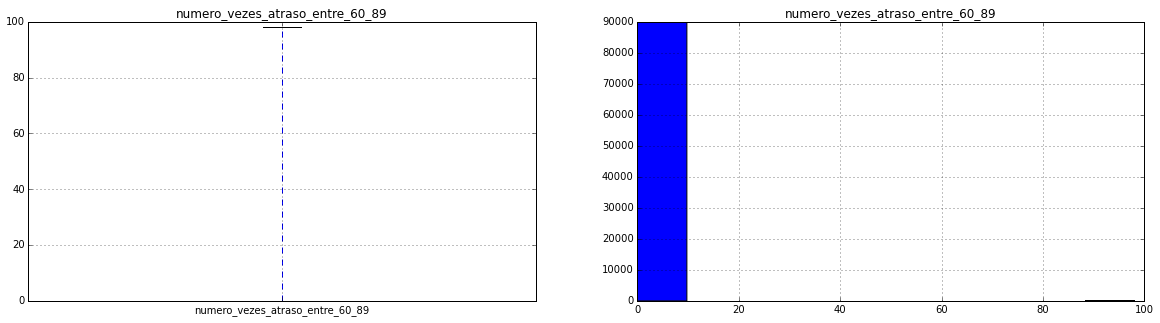

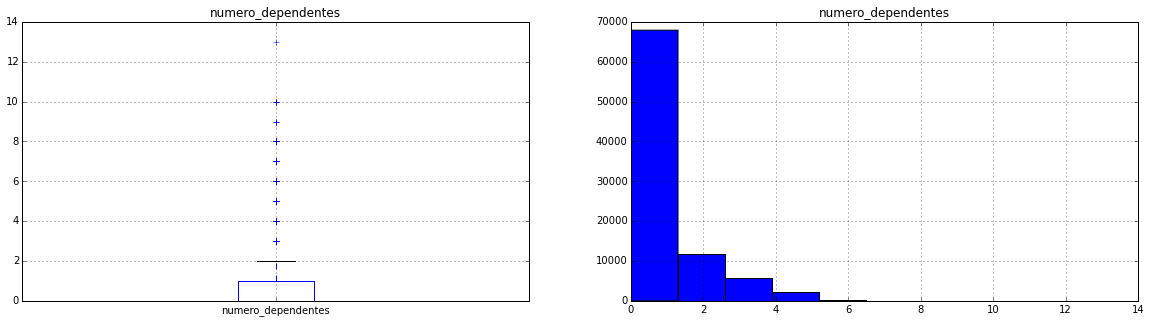

In [14]:
for variavel in df_train.columns[1:]:
    plt.figure(figsize=[20,5])
    ## Boxplots
    plt.subplot(1,2,1)
    df_train[[variavel]].boxplot()
    plt.title(variavel)
    ## Histogramas
    plt.subplot(1,2,2)
    df_train[variavel].hist()
    plt.title(variavel)
    plt.show()

In [15]:
df_train[df_train.columns[1:]].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,porcentagem_utilizacao,idade,numero_vezes_atraso_entre_30_59,divida_pela_renda,renda,numero_linhas_credito,numero_vezes_atraso_maior_90,numero_hipotecas,numero_vezes_atraso_entre_60_89,numero_dependentes
count,90000.000000,90000.000000,90000.000000,90000.000000,72182.000000,90000.000000,90000.000000,90000.000000,90000.000000,87657.000000
mean,5.807006,52.313522,0.409844,353.965895,6678.003768,8.465133,0.252133,1.017078,0.226478,0.757407
std,217.834746,14.764171,4.034296,2008.330750,15454.700039,5.134780,4.009124,1.109755,3.994072,1.119035
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.002997,33.000000,0.000000,0.032456,2005.100000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030146,41.000000,0.000000,0.175926,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154841,52.000000,0.000000,0.367174,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.558888,63.000000,0.000000,0.874842,8249.000000,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.980864,72.000000,1.000000,1273.100000,11666.000000,15.000000,0.000000,2.000000,0.000000,2.000000


# Análise com o target

In [17]:
def def_rate_bin(target, feature, bins_number = 10, label = ''):
    '''
    Categorize the feature in bins and plot the default rate for each bin
    :param target: Target series
    :param feature: Feature series
    :param bins_number: number of bins to categorize each feature
    :return: a plot
    '''
    break_points = list(np.unique(np.percentile(feature[~feature.isnull()], [10,20,30,40,50,60,70,80,90])))
    break_points.append(np.Inf)
    break_points.append(-np.Inf)
    break_points.sort()
    feature_cat = pd.cut(feature, break_points)
    df = pd.DataFrame({'target': target, 'feature': feature_cat})
    df.feature = df.feature.apply(str)
    df.groupby('feature').apply(np.mean).plot(kind='barh', ax=plt.gca(), legend=False)
    plt.title(label)
    plt.show()

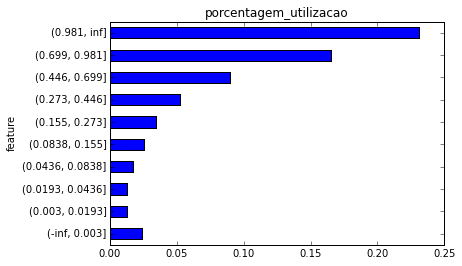

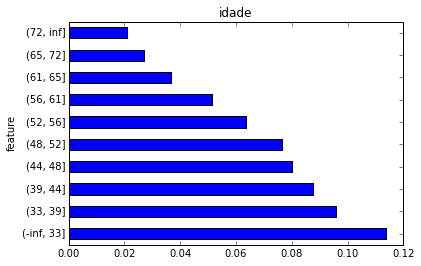

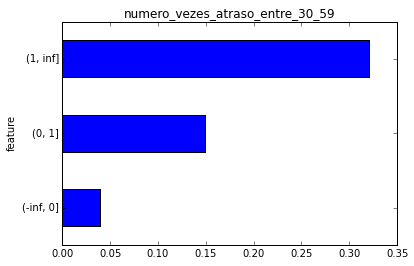

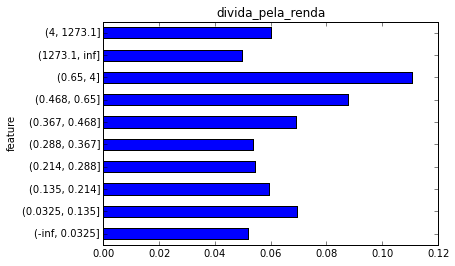

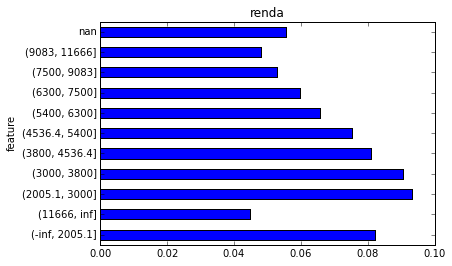

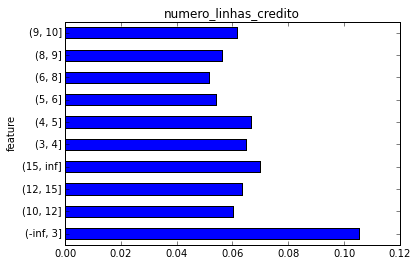

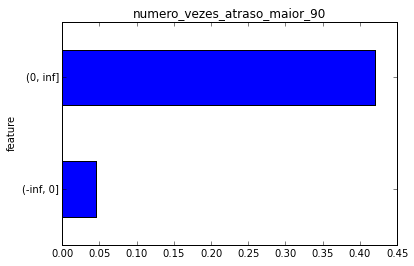

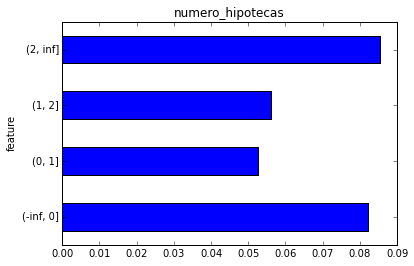

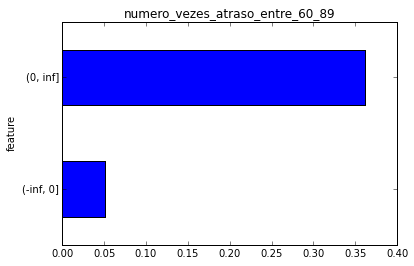

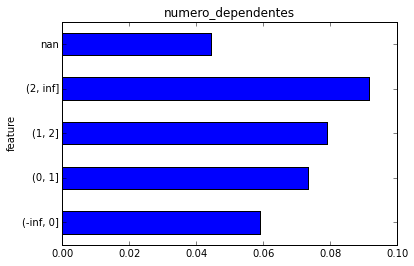

In [18]:
for variavel in dados.columns[1:]:
    def_rate_bin(df_train.target, df_train[variavel], bins_number=10, label=variavel)

# Criação Novas Variáveis

In [20]:
## Train
df_train['log_porcentagem_utilizacao'] = np.log(df_train.porcentagem_utilizacao+1)
df_train['divida_pela_renda_quadrado'] = df_train['divida_pela_renda']**2
df_train['renda_quadrado'] = df_train['renda']**2
df_train['valor_divida'] = df_train['divida_pela_renda']*df_train['renda']
df_train['atraso_60_89_por_atraso_30_59'] = df_train['numero_vezes_atraso_entre_60_89']/df_train['numero_vezes_atraso_entre_30_59']
df_train.loc[df_train.numero_vezes_atraso_entre_30_59==0,'atraso_60_89_por_atraso_30_59'] = 0 
df_train['atraso_90_00_por_atraso_60_89'] = df_train['numero_vezes_atraso_maior_90']/df_train['numero_vezes_atraso_entre_60_89']
df_train.loc[df_train.numero_vezes_atraso_entre_60_89==0,'atraso_90_00_por_atraso_60_89'] = 0 

## Validation
df_val['log_porcentagem_utilizacao'] = np.log(df_val.porcentagem_utilizacao+1)
df_val['divida_pela_renda_quadrado'] = df_val['divida_pela_renda']**2
df_val['renda_quadrado'] = df_val['renda']**2
df_val['valor_divida'] = df_val['divida_pela_renda']*df_val['renda']
df_val['atraso_60_89_por_atraso_30_59'] = df_val['numero_vezes_atraso_entre_60_89']/df_val['numero_vezes_atraso_entre_30_59']
df_val.loc[df_val.numero_vezes_atraso_entre_30_59==0,'atraso_60_89_por_atraso_30_59'] = 0 
df_val['atraso_90_00_por_atraso_60_89'] = df_val['numero_vezes_atraso_maior_90']/df_val['numero_vezes_atraso_entre_60_89']
df_val.loc[df_val.numero_vezes_atraso_entre_60_89==0,'atraso_90_00_por_atraso_60_89'] = 0 

## Test
df_test['log_porcentagem_utilizacao'] = np.log(df_test.porcentagem_utilizacao+1)
df_test['divida_pela_renda_quadrado'] = df_test['divida_pela_renda']**2
df_test['renda_quadrado'] = df_test['renda']**2
df_test['valor_divida'] = df_test['divida_pela_renda']*df_test['renda']
df_test['atraso_60_89_por_atraso_30_59'] = df_test['numero_vezes_atraso_entre_60_89']/df_test['numero_vezes_atraso_entre_30_59']
df_test.loc[df_test.numero_vezes_atraso_entre_30_59==0,'atraso_60_89_por_atraso_30_59'] = 0 
df_test['atraso_90_00_por_atraso_60_89'] = df_test['numero_vezes_atraso_maior_90']/df_test['numero_vezes_atraso_entre_60_89']
df_test.loc[df_test.numero_vezes_atraso_entre_60_89==0,'atraso_90_00_por_atraso_60_89'] = 0 

/Users/carlos/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carlos/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carlos/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation

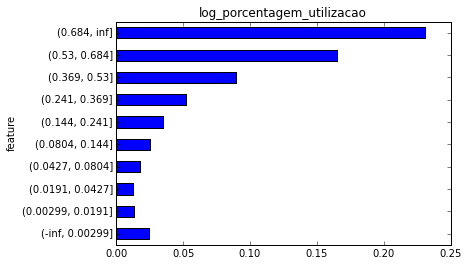

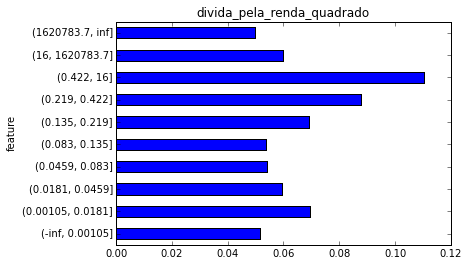

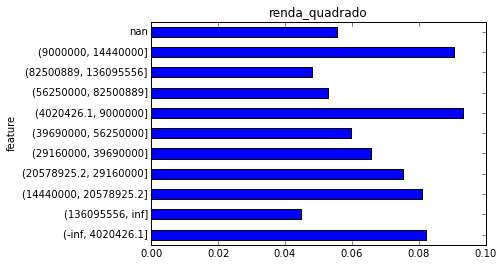

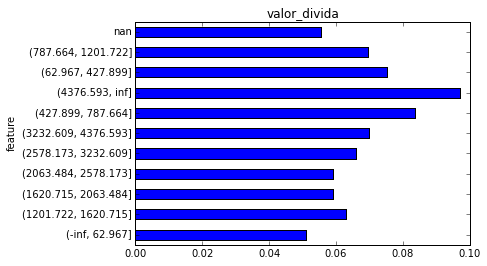

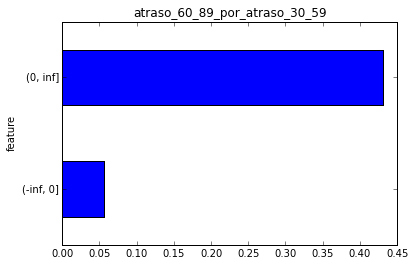

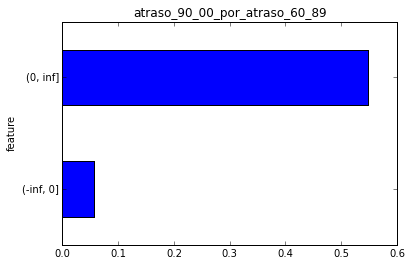

In [21]:
for variavel in ['log_porcentagem_utilizacao', 'divida_pela_renda_quadrado', 'renda_quadrado', 'valor_divida',
                 'atraso_60_89_por_atraso_30_59', 'atraso_90_00_por_atraso_60_89']:
    def_rate_bin(df_train.target, df_train[variavel], bins_number=10, label=variavel)

# Outliers

In [22]:
for variavel in df_train.columns[1:]:
    ## Train
    df_train[variavel+'_out'] = df_train[variavel]
    df_train.loc[df_train[variavel] < np.percentile(df_train[variavel+'_out'], 1), 
                 variavel+'_out'] =np.percentile(df_train[variavel+'_out'], 1)
    df_train.loc[df_train[variavel] > np.percentile(df_train[variavel+'_out'], 99), 
                 variavel+'_out'] = np.percentile(df_train[variavel+'_out'], 99)
    
    ## Validation
    df_val[variavel+'_out'] = df_val[variavel]
    df_val.loc[df_val[variavel] < np.percentile(df_train[variavel+'_out'], 1), 
                 variavel+'_out'] =np.percentile(df_train[variavel+'_out'], 1)
    df_val.loc[df_val[variavel] > np.percentile(df_train[variavel+'_out'], 99), 
                 variavel+'_out'] = np.percentile(df_train[variavel+'_out'], 99)
    
    ## Test
    df_test[variavel+'_out'] = df_test[variavel]
    df_test.loc[df_test[variavel] < np.percentile(df_train[variavel+'_out'], 1), 
                 variavel+'_out'] =np.percentile(df_train[variavel+'_out'], 1)
    df_test.loc[df_test[variavel] > np.percentile(df_train[variavel+'_out'], 99), 
                 variavel+'_out'] = np.percentile(df_train[variavel+'_out'], 99)
    

/Users/carlos/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [23]:
df_train[df_train.columns[1:]].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,porcentagem_utilizacao,idade,numero_vezes_atraso_entre_30_59,divida_pela_renda,renda,numero_linhas_credito,numero_vezes_atraso_maior_90,numero_hipotecas,numero_vezes_atraso_entre_60_89,numero_dependentes,...,numero_vezes_atraso_maior_90_out,numero_hipotecas_out,numero_vezes_atraso_entre_60_89_out,numero_dependentes_out,log_porcentagem_utilizacao_out,divida_pela_renda_quadrado_out,renda_quadrado_out,valor_divida_out,atraso_60_89_por_atraso_30_59_out,atraso_90_00_por_atraso_60_89_out
count,90000.000000,90000.000000,90000.000000,90000.000000,72182.000000,90000.000000,90000.000000,90000.000000,90000.000000,87657.000000,...,90000.000000,90000.000000,90000.000000,87657.000000,90000.000000,90000.000000,7.218200e+04,72182.000000,90000.000000,90000.000000
mean,5.807006,52.313522,0.409844,353.965895,6678.003768,8.465133,0.252133,1.017078,0.226478,0.757407,...,0.085556,0.993022,0.062600,0.757407,0.246167,930094.718555,2.834402e+08,2138.382249,0.021943,0.016632
std,217.834746,14.764171,4.034296,2008.330750,15454.700039,5.134780,4.009124,1.109755,3.994072,1.119035,...,0.399018,0.986997,0.288586,1.119035,0.246883,3559823.050049,3.528752e+10,4748.583069,0.136771,0.125132
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1%,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
10%,0.002997,33.000000,0.000000,0.032456,2005.100000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002992,0.001053,4.020426e+06,62.967363,0.000000,0.000000
25%,0.030146,41.000000,0.000000,0.175926,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.029700,0.030950,1.156000e+07,596.849599,0.000000,0.000000
50%,0.154841,52.000000,0.000000,0.367174,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.143962,0.134817,2.916000e+07,1620.714943,0.000000,0.000000
75%,0.558888,63.000000,0.000000,0.874842,8249.000000,11.000000,0.000000,2.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,1.000000,0.443973,0.765349,6.804600e+07,2879.058684,0.000000,0.000000
90%,0.980864,72.000000,1.000000,1273.100000,11666.000000,15.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,2.000000,0.000000,2.000000,0.683533,1620783.700000,1.360956e+08,4376.593286,0.000000,0.000000


# Imputação

In [24]:
dictionary_impute = {'renda_out': 6000,'renda_quadrado_out': 36000000,'valor_divida_out':1700,
                     'numero_dependentes_out':0}
vars_imp = dictionary_impute.keys()
medians = map(dictionary_impute.get, vars_imp)

for cont, variavel in enumerate(vars_imp):
    df_train.loc[df_train[variavel].isnull(), variavel] = medians[cont]
    df_val.loc[df_val[variavel].isnull(), variavel] = medians[cont]
    df_test.loc[df_test[variavel].isnull(), variavel] = medians[cont]

In [25]:
for variavel in df_train.columns[1:]:
    print '% Missing - ' + variavel + ': ' + str(sum(df_train[variavel].isnull())*1./df_train.shape[0])

% Missing - porcentagem_utilizacao: 0.0
% Missing - idade: 0.0
% Missing - numero_vezes_atraso_entre_30_59: 0.0
% Missing - divida_pela_renda: 0.0
% Missing - renda: 0.197977777778
% Missing - numero_linhas_credito: 0.0
% Missing - numero_vezes_atraso_maior_90: 0.0
% Missing - numero_hipotecas: 0.0
% Missing - numero_vezes_atraso_entre_60_89: 0.0
% Missing - numero_dependentes: 0.0260333333333
% Missing - log_porcentagem_utilizacao: 0.0
% Missing - divida_pela_renda_quadrado: 0.0
% Missing - renda_quadrado: 0.197977777778
% Missing - valor_divida: 0.197977777778
% Missing - atraso_60_89_por_atraso_30_59: 0.0
% Missing - atraso_90_00_por_atraso_60_89: 0.0
% Missing - porcentagem_utilizacao_out: 0.0
% Missing - idade_out: 0.0
% Missing - numero_vezes_atraso_entre_30_59_out: 0.0
% Missing - divida_pela_renda_out: 0.0
% Missing - renda_out: 0.0
% Missing - numero_linhas_credito_out: 0.0
% Missing - numero_vezes_atraso_maior_90_out: 0.0
% Missing - numero_hipotecas_out: 0.0
% Missing - nume

# Model - Random Forest

In [26]:
features = ['porcentagem_utilizacao_out',
             'idade_out',
             'numero_vezes_atraso_entre_30_59_out',
             'divida_pela_renda_out',
             'renda_out',
             'numero_linhas_credito_out',
             'numero_vezes_atraso_maior_90_out',
             'numero_hipotecas_out',
             'numero_vezes_atraso_entre_60_89_out',
             'numero_dependentes_out',
             'log_porcentagem_utilizacao_out',
             'divida_pela_renda_quadrado_out',
             'renda_quadrado_out',
             'valor_divida_out',
             'atraso_60_89_por_atraso_30_59_out',
             'atraso_90_00_por_atraso_60_89_out']

In [29]:
X = df_train[features].values
y = df_train['target'].values

rf = es.RandomForestClassifier(n_estimators=500,
                              bootstrap=True,
                              oob_score=True,
                              random_state=2312,
                              n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=2312, verbose=0, warm_start=False)

OOB Score: 0.94


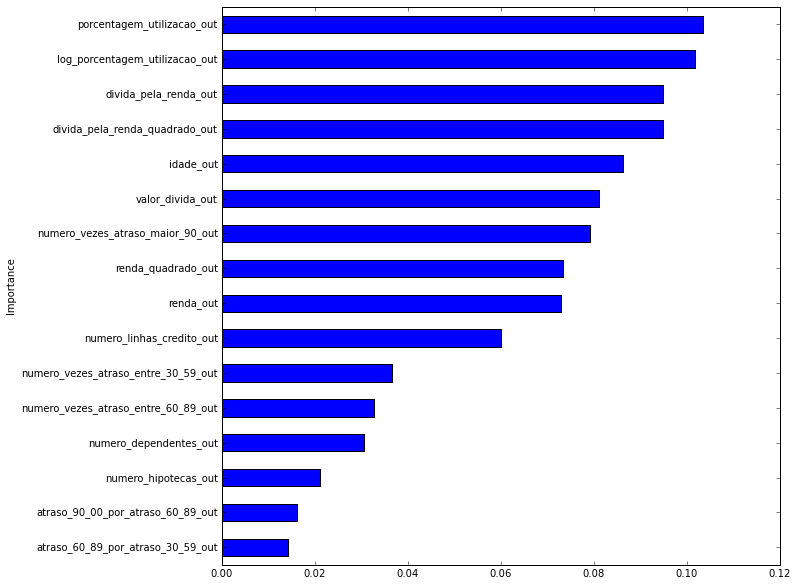

In [36]:
print "OOB Score: %.2f" %rf.oob_score_
(pd.DataFrame(zip(features, rf.feature_importances_),columns=['Features','Importances'])
 .sort('Importances')
 .plot(kind='barh',x='Features',y='Importances',figsize=(10,10),legend=False));
plt.ylabel('Importance');

# Performance na Validação

In [43]:
X_val = df_val[features].values
X_test = df_test[features].values

Y_val = df_val['target'].values
Y_test = df_test['target'].values

Yhat_val = rf.predict_proba(X_val)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(Y_val, Yhat_val[:,1])
metric_val = metrics.auc(fpr_val, tpr_val)
print 'AUC - Validação: ' + str(metric_val)

AUC - Validação: 0.840285373764


In [42]:
df_train.to_csv('Train.csv')
df_val.to_csv('Validation.csv')
df_test.to_csv('Test.csv')

# Model - Boosting

In [46]:
X = df_train[features].values
y = df_train['target'].values

gbm = es.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                                   subsample=1.0, min_samples_split=2, min_samples_leaf=1)
gbm.fit(X, y)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

# Performance na Validação

In [48]:
X_val = df_val[features].values
X_test = df_test[features].values

Y_val = df_val['target'].values
Y_test = df_test['target'].values

Yhat_val = gbm.predict_proba(X_val)
fpr_val, tpr_val, thresholds_val = metrics.roc_curve(Y_val, Yhat_val[:,1])
metric_val = metrics.auc(fpr_val, tpr_val)
print 'AUC - Validação: ' + str(metric_val)

AUC - Validação: 0.858041579862


# Performance Teste

### Random Forest

In [51]:
Yhat_test = rf.predict_proba(X_test)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(Y_test, Yhat_test[:,1])
metric_test = metrics.auc(fpr_test, tpr_test)
print 'AUC - Teste: ' + str(metric_test)

AUC - Teste: 0.846605901989


### Boosting

In [52]:
Yhat_test = gbm.predict_proba(X_test)
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(Y_test, Yhat_test[:,1])
metric_test = metrics.auc(fpr_test, tpr_test)
print 'AUC - Teste: ' + str(metric_test)

AUC - Teste: 0.864122400306
